## Connecting to database and then performing commands

Hands on!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


In [3]:
conn = sqlite3.connect(r'D:\Maahin Coding\Coding\Numpy\sakila.db')

df = pd.read_sql('''
                 SELECT
                 rental.rental_date,
                 rental.return_date,
                 customer.last_name AS customer_lastname,
                 store.store_id,
                 city.city AS rental_store_city,
                 film.title AS film_title,
                 film.rental_duration AS film_rental_duration,
                 film.rental_rate AS film_rental_rate,
                 film.replacement_cost AS film_replacement_cost,
                 film.rating AS film_rating
                 FROM rental
                 INNER JOIN customer ON rental.customer_id == customer.customer_id
                 INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
                 INNER JOIN film ON inventory.film_id == film.film_id
                 INNER JOIN store ON inventory.store_id == store.store_id
                 INNER JOIN address ON store.address_id == address.address_id
                 INNER JOIN city ON address.city_id == city.city_id
                 ;
                 ''', conn, parse_dates=['rental_date', 'return_date'])


In [4]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
0,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
1,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
2,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
3,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
4,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [5]:
df.shape

(16044, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.2+ MB


In [9]:
df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


In [10]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [11]:
df['film_rental_rate'].mean()

2.9426302667663933

In [12]:
df['film_rental_rate'].median()

2.99

<Axes: >

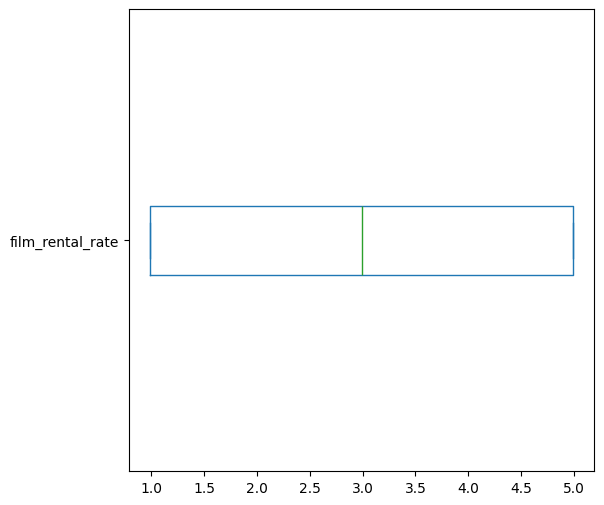

In [18]:
df['film_rental_rate'].plot(kind='box',vert=False,figsize=(6,6))

<Axes: ylabel='Density'>

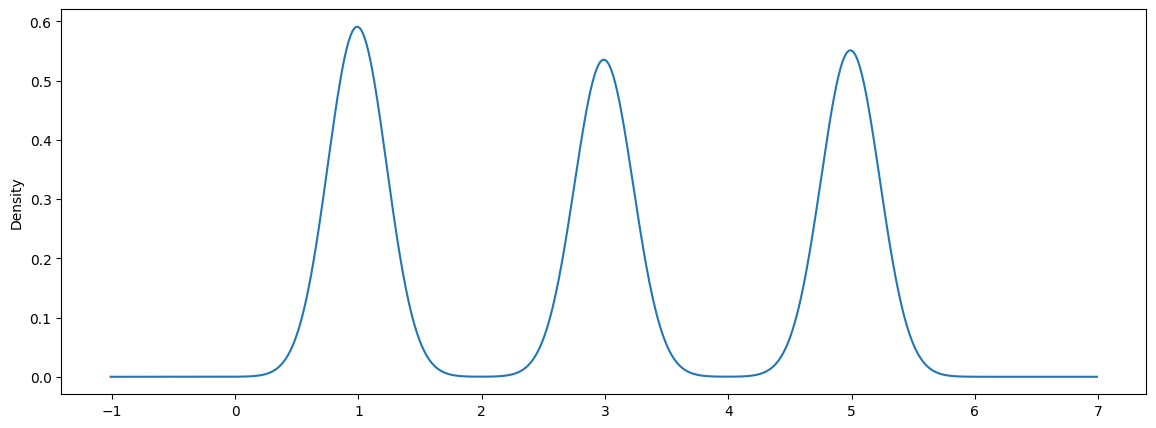

In [22]:
df['film_rental_rate'].plot(kind="density",figsize=(14,5))

Text(0, 0.5, 'Number of Rentals')

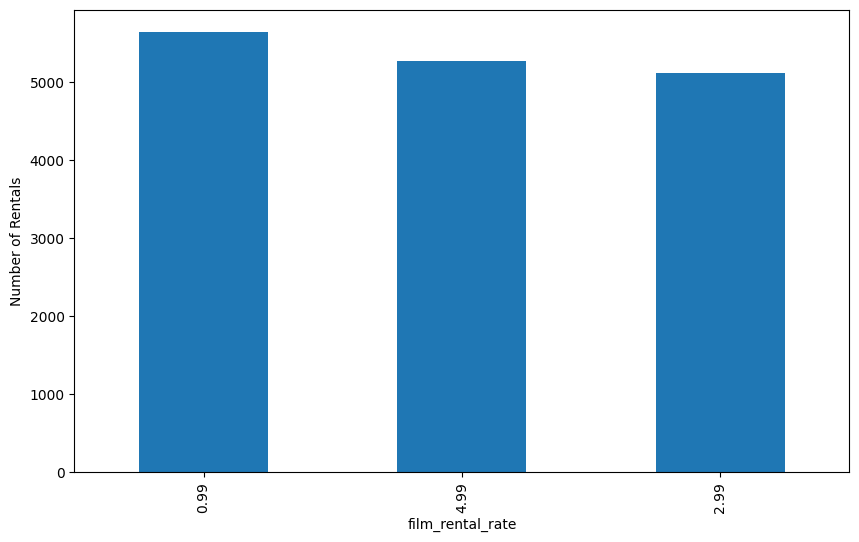

In [23]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar' ,figsize=(10,6))
ax.set_ylabel("Number of Rentals")

We'll analyze the rental_store_city

<Axes: ylabel='count'>

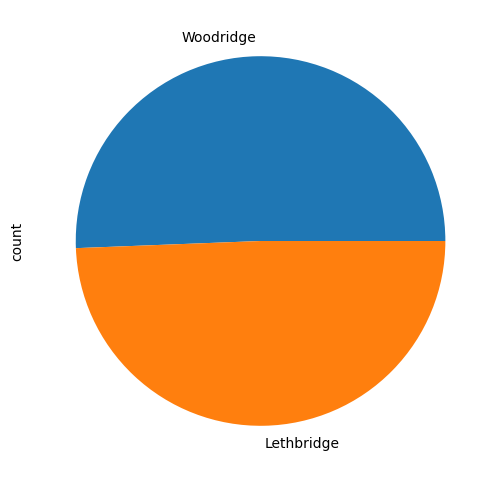

In [25]:
df['rental_store_city'].value_counts().plot(kind='pie',figsize=(6,6))

Add column new rental_rate_return 

In [27]:
df['rental_gain_return']=df['film_rental_rate']/df['film_replacement_cost']*100
df['rental_gain_return'].head

<bound method NDFrame.head of 0        13.597090
1        17.598587
2        19.946631
3         4.502046
4         9.969990
           ...    
16039     4.126719
16040     3.414971
16041     6.191370
16042    17.212832
16043     3.809157
Name: rental_gain_return, Length: 16044, dtype: float64>

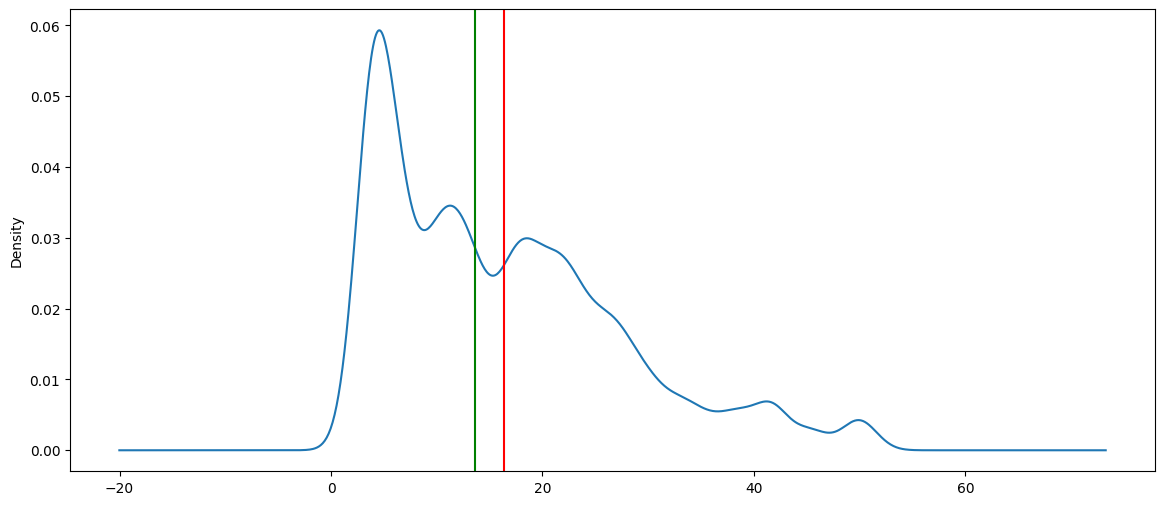

In [30]:
ax = df['rental_gain_return'].plot(kind="density",figsize=(14,6))
ax.axvline(df['rental_gain_return'].mean(),color='red')
ax.axvline(df['rental_gain_return'].median(),color='green')

## Selection & Indexing

In [33]:
df.loc[df['customer_lastname'] == 'HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
4,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
133,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
414,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
807,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1004,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1366,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2600,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5206,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5263,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100
5589,2005-07-10 04:26:13,2005-07-19 02:32:13,HANSEN,2,Woodridge,LUKE MUMMY,5,2.99,21.99,NC-17,13.597090


How many PG and PG-13 rating films were rented?

<Axes: >

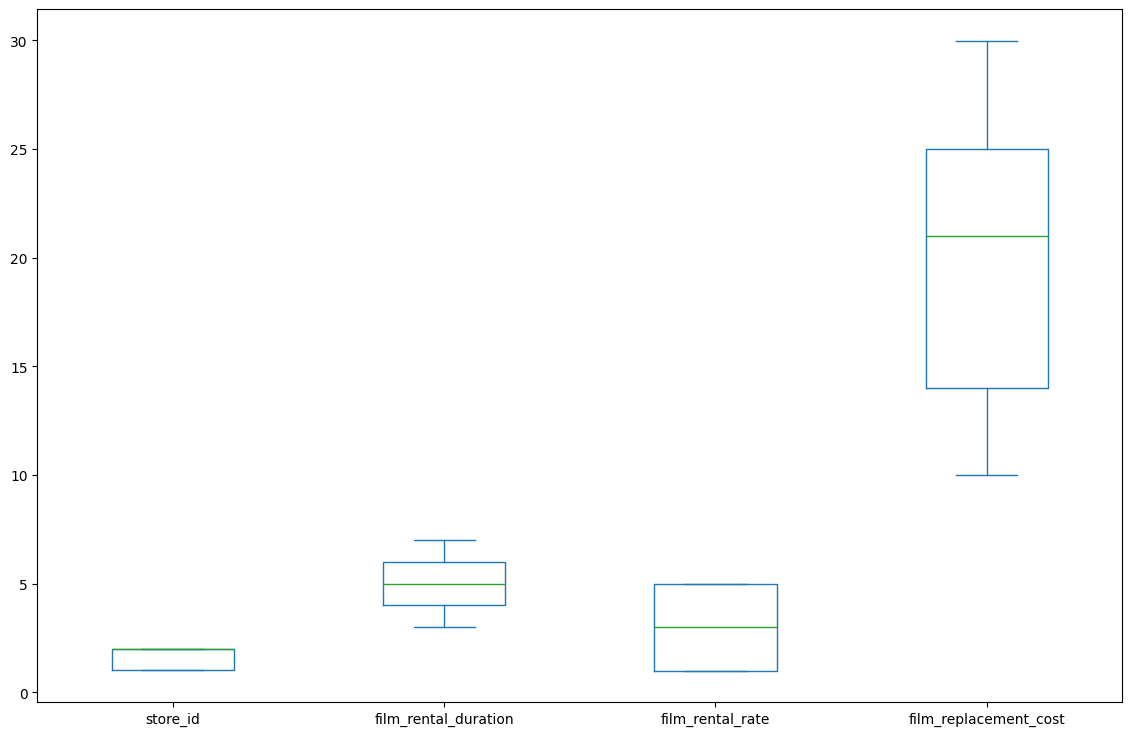

In [7]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].plot(kind="box",figsize=(14,9))